In [90]:
import pandas as pd
import numpy as np

#### Einlesen des Datensatzes

In [91]:
X = pd.read_csv('05_diabetes.csv')
X.head()
print(X.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


#### Abspalten der Labels

In [92]:
y = X.iloc[:,-1]
X = X.drop(X.columns[-1], axis=1)

#### Verteilung der Labels

In [93]:
y.value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

# Aufgabe 1: Modellbewertung mittels Kreuzvalidierung

#### a) Einfache Holdout-Methode

Wenden Sie die einfache Holdout-Methode an, um die Performance eines DecisionTrees-Classifiers mit den Parametern *max_depth*=6 und *min_samples_leaf*=3 zu bewerten. Trainieren Sie diesen mit sklearn auf einem Trainingsdatensatz, der 90% der Daten enthält, und werten Sie anschließend die Accuracy (=Anteil aller Instanzen, die korrekt klassifiziert wurden) auf dem Trainings- und auf dem Testdatensatz aus. Welche Beobachtung machen Sie? 
<br><br>
Hinweis: Zur Berechnung der Accuracy können Sie die Methode **score** der Klasse DecisionTreeClassifier verwenden.

In [94]:
#TODO
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv('05_diabetes.csv')

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

clf = DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 3)
clf = clf.fit(X_train, y_train)

score_test = clf.score(X_test, y_test)
score_train = clf.score(X_train, y_train)

print(score_test)
print(score_train)

0.6233766233766234
0.8596237337192475


#### b) $k$-fache Kreuzvalidierung anwenden

Wiederholen Sie nun Teilaufgabe a), indem Sie $10$-fache Kreuzvalidierung durchführen. Verwenden Sie dazu die Klasse <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html">*StratifiedKFold*</a>. Geben Sie die mittlere gemessene Accuracy (gemittelt über die 10 Testdatensätze) aus. Geben Sie außerdem für jeden einzelnen der 10 Durchläufe die Accuracy auf dem jeweiligen Trainings- und Testdatensatz an. Vergleichen Sie mit dem Ergebnis aus Teilaufgabe a). Bewerten Sie die Varianz des Modells.

In [95]:
#TODO
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import explained_variance_score

skf = StratifiedKFold(n_splits=10)

n = 0
for train_index, test_index in skf.split(X, y):
    Xs_train, Xs_test = X.iloc[train_index], X.iloc[test_index]
    ys_train, ys_test = y[train_index], y[test_index]
    
    clf = DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 3)
    clf = clf.fit(Xs_train, ys_train)

    score_test = clf.score(Xs_test, ys_test)
    score_train = clf.score(Xs_train, ys_train)
    
    y_test_true = ys_test
    y_test_pred = clf.predict(Xs_test)
    
    y_train_true = ys_train
    y_train_pred = clf.predict(Xs_train)
    
    varianz_test = explained_variance_score(y_test_true, y_test_pred)
    varianz_train = explained_variance_score(y_train_true, y_train_pred)
    
    
    print(n)
    print("SCORE")
    print("test: ",score_test)
    print("train: ",score_train)
    print("VARIANZ")
    print("test: ",varianz_test)
    print("train: ",varianz_train)
    print("\n")
    
    n+=1
    


0
SCORE
test:  0.7142857142857143
train:  0.8639652677279306
VARIANZ
test:  -0.251851851851852
train:  0.4063808206546794


1
SCORE
test:  0.7012987012987013
train:  0.8480463096960926
VARIANZ
test:  -0.22222222222222188
train:  0.33984324573536173


2
SCORE
test:  0.6753246753246753
train:  0.8437047756874095
VARIANZ
test:  -0.40740740740740744
train:  0.3118672199170123


3
SCORE
test:  0.6103896103896104
train:  0.8581765557163531
VARIANZ
test:  -0.7081481481481482
train:  0.3808944213923464


4
SCORE
test:  0.7142857142857143
train:  0.8625180897250362
VARIANZ
test:  -0.14814814814814814
train:  0.4004610419548177


5
SCORE
test:  0.7272727272727273
train:  0.8509406657018813
VARIANZ
test:  -0.10814814814814788
train:  0.3826832641770399


6
SCORE
test:  0.7922077922077922
train:  0.829232995658466
VARIANZ
test:  0.11407407407407377
train:  0.2487413554633472


7
SCORE
test:  0.8571428571428571
train:  0.8364688856729378
VARIANZ
test:  0.3911111111111113
train:  0.2913047487321345


# Aufgabe 2: Hyperparameteroptimierung durch GridSearch

#### a) $k$-fache Kreuzvalidierung

Erläutern Sie das Prinzip der $k$-fachen Kreuzvalidierung zur Hyperparameter-Optimierung. Geben Sie genau an, auf welchem Datensatz die einzelnen Trainings- und Auswertungsschritte jeweils vorgenommen werden.

#### b) Train-Test-Split

Splitten Sie den Datensatz in einen Trainings- und einen Testdatensatz auf, wobei der Testdatensatz 20% der Samples enhalten soll. 

In [98]:
#TODO
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#### c) GridSearchCV

Wenden Sie $10$-fache Kreuzvalidierung auf dem Trainingsdatensatz an, um die besten Werte für die Hyperparameter *max_depth* und *min_samples_leaf* durch Rastersuche (engl. "grid search") zu ermitteln. Testen Sie für *max_depth* die Werte $\{1,2,3,4,5,6,7,8,9,10,15,20\}$ und für 
*min_samples_leaf* die Werte $\{1,5,10,20\}$. Geben Sie für jede mögliche Kombination die durch $k$-fache Kreuzvalidierung erhaltene mittlere Accuracy aus. Für welche Werte-Kombination ist diese am größten?

Hinweise: <br>
- Klasse <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html">GridSearchCV</a> aus dem Paket sklearn.model_selection
- Die Attribute *best_params_* und  *best_score_* enthalten die optimalen Parameter und die zugehörige Accuracy
- Das Attribut *cv_results_* enthält die Infos zu allen Parameter-Kombinationen

In [99]:
#TODO
from sklearn.model_selection import GridSearchCV
from sklearn import svm

parameters = {"max_depth":[1,2,3,4,5,6,7,8,9,10,15,20], "min_samples_leaf":[1,5,10,20]}
tree = DecisionTreeClassifier()

clf = GridSearchCV(tree, parameters)
clf.fit(X_train, y_train)

print("\n\nBEST PARAMS",clf.best_params_)
print("BEST SCORE",clf.best_score_)
print("\n\nAll:")
for r in range(len(clf.cv_results_['mean_test_score'])):
    print("max_depth: ", clf.cv_results_["param_max_depth"][r], "   min_sample_leaf: ",clf.cv_results_["param_min_samples_leaf"][r], "   score: ",clf.cv_results_['mean_test_score'][r])







BEST PARAMS {'max_depth': 4, 'min_samples_leaf': 10}
BEST SCORE 0.7687458349993336


All:
max_depth:  1    min_sample_leaf:  1    score:  0.7280287884846062
max_depth:  1    min_sample_leaf:  5    score:  0.7280287884846062
max_depth:  1    min_sample_leaf:  10    score:  0.7280287884846062
max_depth:  1    min_sample_leaf:  20    score:  0.7280287884846062
max_depth:  2    min_sample_leaf:  1    score:  0.7557377049180328
max_depth:  2    min_sample_leaf:  5    score:  0.7573637211781954
max_depth:  2    min_sample_leaf:  10    score:  0.7573637211781954
max_depth:  2    min_sample_leaf:  20    score:  0.7573637211781954
max_depth:  3    min_sample_leaf:  1    score:  0.7573903771824604
max_depth:  3    min_sample_leaf:  5    score:  0.7541383446621351
max_depth:  3    min_sample_leaf:  10    score:  0.759016393442623
max_depth:  3    min_sample_leaf:  20    score:  0.7557377049180328
max_depth:  4    min_sample_leaf:  1    score:  0.7540717046514727
max_depth:  4    min_sample_leaf

#### d) Modelltraining mit den optimalen Parametern

Trainieren Sie nun einen DecisionTreeClassifier mit den optimalen Parametern auf dem Trainingsdatensatz und werten Sie die Accuracy auf dem Trainings- und auf dem Testdatensatz aus. Was beobachten Sie? Vergleichen Sie mit den Ergebnissen aus Teilaufgabe c)

In [82]:
#TODO
clf = DecisionTreeClassifier(max_depth = clf.best_params_["max_depth"], min_samples_leaf = clf.best_params_["min_samples_leaf"])
clf = clf.fit(X_train, y_train)

score_test = clf.score(X_test, y_test)
score_train = clf.score(X_train, y_train)

print("test: ", score_test)
print("train: ", score_train)

test:  0.7467532467532467
train:  0.8127035830618893


#### e) Modellbewertung: Verzerrung und Varianz

Untersuchen/Bewerten Sie die Verzerrung und die Varianz des resultierenden Modells.

In [100]:

#TODO (hier muss ggf. kein neuer Code geschrieben werden)

#Geringer Unterschied zwischen Train- und Testscore -> Geringe Varianz (keine Überanpassung -> gut für neue Daten geeignet)
#Geringe Verzerrung, da Score hoch 

# Aufgabe 3: Regularisierung bei der polynomialen Regression

#### Erzeugung von Zufallsdaten

In [192]:
X = np.array([0, 1, 2, 2.5, 3, 3.6, 4, 4.7, 5])
y = 0.5*X + 1 + 0.3*np.random.randn(len(X))

X = X/np.max(X)
y = y/np.max(y)

#### Visualisierung der Datenpunkte

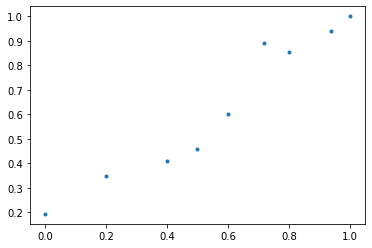

In [193]:
import matplotlib.pyplot as plt
plt.plot(X,y,'.')

#### a) Polynomiale Regression: Parameterbestimmung durch Aufstellen und Lösen der Normalgleichungen

Implementieren Sie eine Funktion namens **polyreg**, die die Parameter $\vec{\theta}=(\theta_0,\theta_1,\ldots,\theta_d)$ einer polynomialen Regression mit Hilfe eines Least-Squares-Ansatzes berechnet. Es soll also in Abhängigkeit vom Polynomgrad $d$ eine Modellfunktion der Form $f_{\vec{\theta}}(x)=\theta_0+\theta_1x+\theta_2x^2+\ldots+\theta_dx^d$ bestimmt werden. Stellen Sie dazu die Normalgleichungen auf (s. Vorlesung über Lineare Regression) und lösen Sie diese.

In [244]:
#def polyreg(X, y, d, L):
def polyreg(X, y, d):
    """
    calculates the coefficients of a polynomial regression function 
    
    Parameters:
        X (array): training examples for the input variable (1-dimensional array)
        y (array): output values corresponding to X (1-dimensional array)
        d (int): degree of the polynomial to be fit
        
    Returns:
        theta (array): coefficients of the regression function
    """
    
    #TODO
    theta = 0
    
    X_m = np.ones((X.shape[0], d+1))    
    for c in range(d+1):
        X_m[:,c] = X ** c


    
    
    X_mt = X_m.transpose()
    inverted = np.linalg.inv(X_mt@X_m)
    
    theta = inverted@X_mt@y
    
    return theta



In [245]:
theta = polyreg(X, y, 10)


#### b) Modellanwendung

Fitten Sie mit Hilfe der in a) implementierten Funktion ein Polynom 10. Grades an die gegebenen Daten. Zeichnen Sie das Polynom mit in die Grafik ein. Welche Beobachtung machen Sie?
<br><br>
Hinweis: mit der Funktion **numpy.polyval** kann man ein Polynom mit gegebenen Koeffizienten auswerten. Dazu muss ggf. die Reihenfolge des Parametervektors theta umgekehrt werden. Dies leistet die Funktion **numpy.flipud**

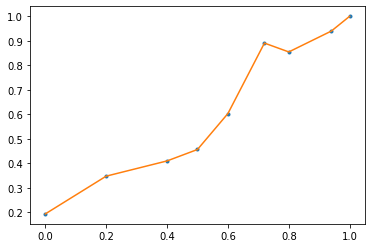

In [262]:
#TODO
theta = polyreg(X, y, 8)

theta = np.flipud(theta)
p = np.polyval(theta, X)

plt.plot(X,y,'.')
plt.plot(X,p)

#### c) Regularisierung

Erweitern Sie die in a) geschriebene Funktion, indem Sie Regularisierung "einbauen". Der Regularisierungsparameter L soll als zusätzliches Argument übergeben werden. Überlegen Sie sich zunächst, wie die Normalgleichungen für die regularisierte polynomiale Regression lauten. Testen Sie anschließend für L=0 und L=1000 die Funktion. Visualisieren Sie jeweils die resultierende Modellfunktion.

In [286]:
def polyreg(X, y, d, L):
    """
    calculates the coefficients of a polynomial regression function 
    
    Parameters:
        X (array): training examples for the input variable (1-dimensional array)
        y (array): output values corresponding to X (1-dimensional array)
        d (int): degree of the polynomial to be fit
        
    Returns:
        theta (array): coefficients of the regression function
    """
    
    #TODO
    theta = 0
    
    X_m = np.ones((X.shape[0], d+1))    
    for c in range(d+1):
        X_m[:,c] = X ** c


    I = np.identity(d+1)
    
    X_mt = X_m.transpose()
    inverted = np.linalg.inv(X_mt@X_m+L*I)
    
    theta = inverted@X_mt@y
    
    return theta


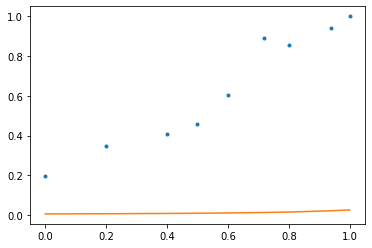

In [293]:
#TODO
#TODO
theta = polyreg(X, y, 8, 1000)

theta = np.flipud(theta)
p = np.polyval(theta, X)

plt.plot(X,y,'.')
plt.plot(X,p)